# <center> Introdução ao Pandas - Parte 3 </center>
___

<p align="center">
  <img src="https://nsee.maua.br/wp-content/uploads/2023/05/logo_nsee_white.svg",width=200, height=120/>
</p>

___

## Neste Notebook
1. [Pandas (Partes 2 e 3)](#pandas)
    1. [Carregando Variáveis](#carregando)
    2. [Juntando DataFrames](#merge)
    3. [Exercício 2.3](#ex2.3)
    4. [Alterando o dataFraame](#alterando)
    5. [Operações em grupo](#group)
    6. [Exercício 2.4](#ex2.4)
    7. [Aplicando funções no Pandas](#func)
    8. [Exercício 2.5](#ex2.5)

___

## <center> Objetivos de aprendizado </center>
- Familiarizar-se com as funcionalidades básicas do Pandas
- Ser capaz de carregar dados em um DataFrame
- Ser capaz de realizar manipulações básicas de dados
___


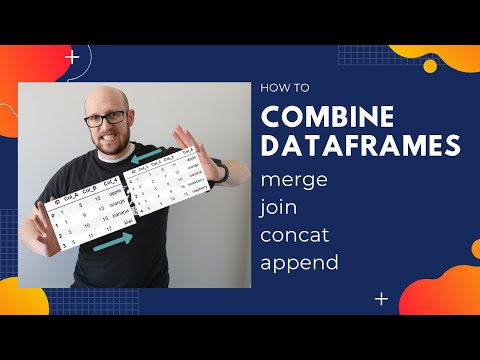

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('wzN1UyfRSWI', width=800, height=450)

<a name="carregando"></a>

## Carregando Variáveis

Para conseguirmos seguir de onde paramos no notebook anterior, faremos a leitura de um arquivo **pickle** na célula a seguir. Não se preocupe em entender o significado da célula a seguir nesse momento. O arquivo ```datasets.pkl``` deve se encontrar junto com os arquivos de dados desse notebook. Basta colocá-lo na mesma pasta do seu notebook (caso esteja rodando pelo Jupyter) ou na raiz dos arquivos (caso esteja usando o Colab) e rodar a célula a seguir.

In [ ]:
import pickle

with open("dados/datasets.pkl", "rb") as f:
    pkmn = pickle.load(f)
    fut_players = pickle.load(f)


<a name="merge"></a>
## 2.7. Juntando DataFrames

É muito comum ter a necessidade de juntar *DataFrames* diferentes. O Pandas tem a funcionalidade de juntar dataframes utilizando o método *.merge()*. Antes do exemplo, vamos aprender os tipos de *joins* mais comuns:<br>

![Joining Methods](https://i.imgur.com/HaSBT91.jpg) <br>


Agora, vamos carregar um DataFrame mais simples para testar os tipos de *merge*.

In [ ]:
import pandas as pd

# Execute esta célula para carregar o dataframe metal_bands com dados de bandas de metal
metal_bands = pd.read_csv("https://raw.githubusercontent.com/pedrogjmesquita/python_notebooks/main/Pandas%20e%20Numpy/dados/metal_bands.csv", sep=",", encoding='Latin')
metal_bands.head(10)

Podemos ver na célula acima, que podemos "importar" um dataframe diretamente de um URL, sem ter que baixar o arquivo. Isso é muito útil quando estamos trabalhando com arquivos muito grandes, que podem demorar para baixar.<br>

Assim como criamos os dataframes *offensive_stats*, *defensive_stats*, *fire_pkmn* e *water_pkmn*, vamos separar alguns dataframes a partir de *metal_bands* para testar os merges. Observe a célula abaixo.

In [ ]:
bands_origin = metal_bands[['id','band_name','formed','origin']] # ano de formação e país das bandas
bands_style = metal_bands[['id','band_name','style']] # estilo das bandas

bands_split = metal_bands[metal_bands['split']!='-'][['id','band_name','split']] # bandas que se separaram
bands_4000_fans = metal_bands[metal_bands['fans']>4000][['id','band_name','fans']] # bandas com mais de 4000 fans
bands_USA = metal_bands[metal_bands['origin']=='USA'][['id','band_name','formed','origin']] # bandas formadas nos EUA
bands_Brazil = metal_bands[metal_bands['origin']=='Brazil'][['id','band_name','formed','origin']] # bandas formadas no Brasil

### 2.7.1. ``inner merge``

Vamos criar um DataFrame a partir de ```bands_origin``` e ```bands_split```, utilizando *merge*.

In [ ]:
origin_split = pd.merge(
    bands_origin, # o DataFrame da esquerda
    bands_split, # o DataFrame da direita
    how='inner', # o tipo de join que queremos fazer
    on='id') # baseado em quais valores em comum (chave)
origin_split.info()
origin_split.head()

Ótimo! Conseguimos fazer o *merge* (termo mais utilizado no Pandas) de dois *DataFrames*. Observe que utilizamos o argumento ```how='inner'```. Lembre-se que *inner*, *left*, *right* e *outer* terão resultados diferentes, observe os merges abaixo e a explicação.

O *inner* mantém apenas os dados das bandas encontradas nos dois dataframes (onde há correspondência de *id*), dessa forma, a posição do dataframe não faz diferença. Pense no *inner* como uma interseção entre dois conjuntos, assim como visto em matemática, desta forma:

$$inner(A,B) = A \cap B$$

Portanto o DataFrame resultante ```origin_split``` é um dataframe que contem as informações de ```id```, ```nome```, ```ano de formação```, ```ano de separação```

### 2.7.2 ``left merge``

In [ ]:
left_origin_split = pd.merge(bands_origin, bands_split, how='left', on='id')
left_origin_split.info()

Como podemos ver com o resultado do método *.info()*, os resultados são de fato bem diferentes.

No *left*, como mostra no [diagrama](#merge) mantemos os dados do dataframe à esquerda, e trazemos os dados do dataframe à direita no qual encontrou-se a chave (neste exemplo, o *id* da banda). Quando fazemos o *left* damos uma *"importância"* maior aos dados do dataframe à esquerda. Assim:

$$left(A,B) = A \cup (A.key \cap B.key)$$

No nosso exemplo, quando fizemos o *left* criamos o ```left_origin_split```, isso nos dá um DataFrame com todas as informações de ```bands_origin``` e apenas as informações de ```bands_split``` cujas bandas estão presentes em ```bands_origin```. Neste exemplo, o datafram resultante é igual ao ```bands_origin```, porém com a coluna de *split*.

### 2.7.3 ``right merge``

In [ ]:
right_origin_split = pd.merge(bands_origin, bands_split, how='right', on='id')
right_origin_split.info()


Por outro lado, no *right* ocorre o contrário, mantemos os dados do dataframe à direita e, quando há correspondência da chave, trazemos os dados do dataframe à esquerda. Assim:

$$right(A,B) = B \cup (B.key \cap A.key)$$

 Note que o número de entradas (*entries*) é diferente do caso com o *left*. Isso ocorre porque no *left* mantemos os dados de formação das bandas (ou seja, o dataframe contém todas as bandas do .csv), enquanto no *right*, mantemos apenas os dados de bandas que se separaram (e existem muitas bandas que ainda continuam juntas).


### 2.7.4 ``Outer Merge``

In [ ]:
print('Numero de linhas do DataFrame bands_4000_fans:', bands_4000_fans.shape[0])
print('Numero de linhas do DataFrame bands_USA:', bands_USA.shape[0])
print('----------------------------------------------')
outer_origin_split = pd.merge(bands_4000_fans, bands_USA, how='outer', on='id')
outer_origin_split.info()

Por fim, no *outer* utilizamos dois dataframes diferentes dos anteriores para facilitar o entendimento. Observe pelos prints que existem apenas 4 bandas com mais de 4000 fans e 1139 bandas formadas nos EUA. Quando fazemos o *merge* com *outer*, observe que o total de linhas passa a ser 1143. O que acontece é que esse tipo de join mantém os dados de ambos os dataframes, independente se houve correspondência de chave ou não. Dessa maneira:

$$outer(A,B) = A\cup B$$


### 2.7.5 Concatenação de DataFrames

Podemos também querer apenas concatenar dois *DataDrames*, isto é, juntá-los colocando um abaixo ou ao lado do outro, assim como fizemos com strings e listas nos primeiros notebooks. Para isso, utilizamos o método *.concat()*:

In [ ]:
USA_Brazil = pd.concat([bands_USA, bands_Brazil], ignore_index=True) # concatenando bandas formadas nos EUA e bandas formadas no Brasil
USA_Brazil.info()

Acima fizemos a concatenação vertical. Vamos fazer a horizontal abaixo:

In [ ]:
bands_origin_style = pd.concat([bands_origin, bands_style], axis=1)
bands_origin_style.info()

Você deve estar se perguntando: mas então qual a diferença entre utilizar o *merge* e o *concat* com axis=1 (concatenação horizontal)? Observe a imagem abaixo.

![concat](https://i.imgur.com/YlmiwsR.png) <br>

Note que o *concat* recebe os dataframes e apenas os empilha (verticalmente ou horizontalmente). Observe agora o funcionamento do *merge* na imagem abaixo.

![merge](https://i.imgur.com/yGum2id.png) <br>

Com o *merge*, podemos combinar os dataframes de acordo com os valores de suas colunas. Passamos a coluna a ser utilizada como chave, e os valores serão apenas combinados caso haja correspondência nos dois dataframes.

<a name="ex2.3"></a>
## Exercício 2.3
Mais uma vez, substitua os \____ de acordo com as instruções

In [ ]:
# melhores é um DataDrame dos melhores jogadores em drible (dribbling) e chute (shooting)
melhores = fut_players[(fut_players.dribbling > 90) & (fut_players.shooting > 90)][['id', 'name', 'position', 'dribbling', 'shooting', 'overall']]

# nacionalidades é um DataDrame da nacionalidade dos jogadores
nacionalidades = fut_players[['id', 'name', 'nationality']]

# faça um merge dos dois DataDrames, mantendo todos os jogadores de melhores e obtendo suas nacionalidades (dica: a chave é o id)
melhores_nacionalidades = ____
melhores_nacionalidades.head()

<a name="alterando"></a>
## 2.8. Alterando o dataframe

Até o momento apenas utilizamos os dados da forma que nos foram fornecidos, mas e se precisássemos criar alguma coluna que fosse a combinação das demais? Por exemplo, caso eu deseje criar uma coluna que corresponde à razão do ataque e defesa dos Pokémons? Observe abaixo:

In [ ]:
# Criando a coluna desejada
pkmn['AttackOverDefense'] = pkmn['Attack'] / pkmn['Defense']
pkmn.head()

Observe como foi fácil! Apenas utilizamos o operador de soma com as duas colunas necessárias. Você pode fazer isso com outras operações também, basta utilizar ```+```, ```-``` ou ```*```. Além disso, você pode combinar quantas colunas quiser!

Mas e se precisarmos alterar apenas algumas linhas do nosso DataFrame?

Por exemplo, suponha que você percebeu que seus dados estão errados, e todos os Pokémons com velocidade acima de 100 deveriam estar marcados como Type_1 = 'Fire', podemos seguir o procedimento abaixo:

In [ ]:
# Observe os valores unicos da coluna Type_1 para os Pokémons com mais de 100 de velocidade
pkmn.loc[pkmn['Speed']>100, 'Type_1'].unique()

In [ ]:
# Vamos alterar tudo para Fire
pkmn.loc[pkmn['Speed']>100, 'Type_1'] = 'Fire'

In [ ]:
# Observe como os valores mudaram
pkmn.loc[pkmn['Speed']>100, 'Type_1'].unique()

Antes de continuar, vamos ler novamente os dados de Pokémon, sem essa última alteração. Execute a célula abaixo.

In [ ]:
pkmn = pd.read_csv(
    'dados/pokemon_data.csv', # o caminho para o arquivo que se quer ler
    sep=',') # o caracter utilizado para separar os valores

pkmn.rename(
    columns={'Type 1':'Type_1', 'Type 2':'Type_2', 'Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'}, # passando o nome antigo e novo como um dicionário
    inplace = True # algumas operações com Pandas criam uma cópia do DataFrame e não alteram o objeto em si, alteramos isso mudando o parâmetro inplace para verdadeiro
)

<a name="group"></a>
## 2.9. Operações em grupo

Com Pandas nós podemos aplicar operações em grupos usando o método *.groupby()*. Ele é muito útil por ser uma forma bem simples de extrair informação de dados agregados. Para utilizá-lo, passamos as colunas nas quais queremos agrupar os dados e a operação que queremos fazer. Para exemplificar, vamos ver quantos Pokémons lendários cada geração tem:

In [ ]:
pkmn.groupby('Generation').Legendary.sum() # fazendo uma soma pois a coluna Legendary é boolean

Podemos obter um relatório da média de diversas colunas para cada tipo de Pokémon:

In [ ]:
pkmn.groupby('Type_1')[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']].mean()

Isso é realmente muito importante e extremamente utilizado com pandas pois conseguimos fazer análises dos grupos com apenas uma linha de código. Podemos perceber, por exemplo, que Pokémons do tipo *Flying* são especialistas em velocidade enquanto *Dragon* e *Fighting* são especialistas em ataque.

<a name="ex2.4"></a>
## Exercício 2.4
Use o método *.groupby()* para descobrir qual país tem o melhor *overall* médio.

In [ ]:
# crie o DataFrame country_avg_overall, que tem o overall médio de cada país (nationality), usando groupby
country_avg_overall = ____

# usamos o método idxmax() para encontrar o maior overall médio
printf("Melhor overall médio: {country_avg_overall.loc[country_avg_overall.idxmax()]}")
printf("Overall médio do Brasil: {country_avg_overall.loc['Brazil']}")

<a name="func"></a>
## 2.10. Aplicando funções no Pandas

Com Pandas, nós temos um grande nível de controle de nossos dados, e somos capazes de transformá-los conforme precisarmos. Nós podemos, até mesmo, executar funções em DataFrames e manipulá-los como quisermos. Vamos revisitar o método head():

In [ ]:
pkmn.head()

Existem algumas mega evoluções misturadas no dataset (apenas alguns Pokémons são capazes de evoluir temporariamente para sua forma Mega, uma forma mais poderosa). Não seria legal se nós tivéssemos alguma flag que nos diria se um pokémon é mega ou não? E, por um acaso, será que os pokémons mega são mais poderosos?

Você deve ter percebido que evoluções mega têm um padrão em nosso DataFrame, algo como 'PokemonMega Pokemon'. Se nós tivermos esse padrão, podemos construir uma função que retorna True se este padrão for detectado:

In [ ]:
def ehMega(pokemon_nome):
    """
    Recebe um nome de pokemon e diz se é uma mega evolução ou não
    I: string pokemon_nome
    O: boolean para Mega evos
    """
    if 'Mega ' in pokemon_nome: # é importante usar 'Mega ' e não 'mega', pois há um pokemon chamado Yanmega e outro chamado Meganium que não são uma mega evolução
        return True
    else:
        return False

Vamos ver se funciona:

In [ ]:
ehMega('VenusaurMega Venusaur')

In [ ]:
ehMega('Squirtle')

Excelente! Seria ótimo se conseguíssemos aplicar essa função em todo nosso DataFrame. Para fazer isso, usaremos o método .apply(). Também criaremos uma coluna que é uma flag se o pokémon é mega:

In [ ]:
pkmn['Mega'] = pkmn.apply(
    lambda linha: ehMega(linha['Name']), # chamando uma função lambda que acabamos de construir
    axis=1 # qual direção queremos executar a função. 0 para horizontal, 1 para vertical
)

Funções ```lambda``` é uma funcionalidade do Python que nos permite criar funções em uma linha de forma mais fácil. Não falaremos muito sobre essas funções, mas ela é muito boa para se ter no seu arsenal de Cientista de Dados. Se você quiser saber mais, [clique aqui](https://www.w3schools.com/python/python_lambda.asp).

In [ ]:
pkmn.head()

Observe como funcionou o apply com lambda. Utilizando o axis=1, a função ```ehMega``` é aplicada para cada linha do nosso DataFrame, recebendo como entrada o *Name* do pokémon daquela linha e retornando a flag de True/False na coluna *Mega*.

Agora, vamos verificar quão poderosos são os pokémons mega:

In [ ]:
pkmn.groupby('Mega').Total.mean()

Eles têm quase 200 stat points a mais que pokémons normais! Evoluções mega são, sim, muito poderosos! 

Uma boa prática é sempre tentar manter nosso DataFrame organizado. A forma como os pokémons mega estão nomeados não é muito ótima, e nós já temos uma coluna com a flag para pokémons Mega, então, vamos atacar isso! A estrutura do nome de um pokémon mega é da seguinte forma: 'NomeMega Nome'. Portanto, se nós pegarmos o que vem após o caractere ' ', teremos o nome original do pokémon!

In [ ]:
pkmn.Name.nunique() # conta elementos únicos de uma determinada coluna

In [ ]:
def get_nome_original(nome):
    """
    Recebe um nome de pokemon e retorna seu nome original
    I: nome string
    O: string
    """
    return nome.split(' ')[0]


Vamos agora usar a função que acabamos de criar para sobreescrever a coluna ``Name`` do nosso DataFrame

In [ ]:

pkmn['Name'] = pkmn.Name.apply(lambda s: get_nome_original(s)) # sobreescrevendo a coluna Name
pkmn.Name.nunique()

In [ ]:
pkmn.head()

Agora nós já cobrimos toda a parte básica de Pandas! Vamos praticar essa última parte!

<a name="ex2.5"></a>
## Exercício 2.5
Crie uma função que retorna a classificação para o jogador de acordo com as instruções abaixo, então aplique isso para o dataframe fut_players.

*Observação:* considere os limites dentro do intervalo de classificação.
exemplo

-50 contém todos os valores menores que 50 e o valor 50 incluso;


51-60 contém todos os valores entre 51 e 60 com os limites [51,60] inclusos no grupo;


e assim por diante ...

In [ ]:
def get_classificacao(overall):
    """
    Recebe um overall de algum jogador e retorna a classificação conforme a seguir:
    Overall -> classificação
    -50     -> "Amador"
    51-60   -> "Ruim"
    61-70   -> "Ok"
    71-80   -> "Bom"
    81-90   -> "Ótimo"
    91+     -> "Lenda"
    
    I: int overall
    O: string
    """
    ____
    
fut_players["classification"] = ____
fut_players.groupby('classification')[['id']].count()

# Fim da aula!

Obrigado por participar do curso, você acaba de finalizar a aula de Python e Pandas. Neste momento você já deve ser capaz de manipular seus dados no Python, utilizando as bibliotecas que acabamos de aprender! 

Lembre-se que sempre que surgir alguma dúvida, você pode olhar a documentação do [NumPy](https://numpy.org/doc/) e do [Pandas](https://pandas.pydata.org/docs/).